<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW6_Decision-Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df.head(10)

director_name  ...  movie_facebook_likes
0      James Cameron  ...                 33000
1     Gore Verbinski  ...                     0
2         Sam Mendes  ...                 85000
3  Christopher Nolan  ...                164000
4        Doug Walker  ...                     0
5     Andrew Stanton  ...                 24000
6          Sam Raimi  ...                     0
7       Nathan Greno  ...                 29000
8        Joss Whedon  ...                118000
9        David Yates  ...                 10000

[10 rows x 27 columns]

In [ ]:
df.shape


(5043, 27)

In [ ]:
df_dropna = df.dropna()
df_dropna = df_dropna.reset_index()
df_dropna.shape

(3757, 28)

In [ ]:
a =pd.DataFrame(df_dropna['actor_1_facebook_likes'])
a.at[1,'actor_1_facebook_likes']

40000.0

In [ ]:
def labelCol(df=df_dropna,col='imdb_score'):
  y = pd.DataFrame(df[col])
  med = np.percentile(df[col],50)
  for i in y.index:
    if y.at[i,col]>=med:
      y.loc[i,col]=int(1)
    else:
      y.loc[i,col]=int(0)
  res = df
  res = res.drop(columns=col)
  res = res.join(y)
  return res

In [ ]:
df_labeled = labelCol()
df_labeled['imdb_score']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3752    1.0
3753    1.0
3754    1.0
3755    1.0
3756    1.0
Name: imdb_score, Length: 3757, dtype: float64

In [ ]:
X = df_labeled.drop(columns='imdb_score')
y = pd.DataFrame(df_labeled['imdb_score'])


In [ ]:
feature_cols = [i for i in X.columns]
feature_cols

['index',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes']

In [ ]:
!pip install category_encoders
from category_encoders import OrdinalEncoder



In [ ]:
X = OrdinalEncoder(c_cols).fit_transform(X)
y.dtypes

imdb_score    float64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy",max_depth=None)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.7127659574468085


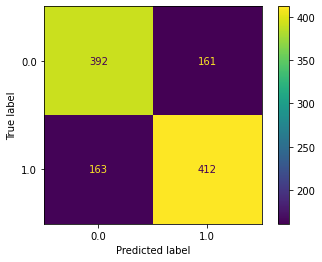

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,values_format='d')
plt.show()

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
precision = 412/(412+161)
recall = 412/(412+163)
f = 2*precision*recall/(precision+recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F-measure: ',f)


Accuracy:  0.7127659574468085
Precision:  0.7190226876090751
Recall:  0.7165217391304348
F-measure:  0.7177700348432057


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'],feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('download.png')
Image(graph.create_png())